## Black-Scholes Theory

Black-Scholes is largely understood as an options pricing formula but it is really a framework that models a financial market. Within this framework the options pricing formula is be derived through stochasitc differentiation. The Black–Scholes model assumes that the market consists of at least one risky asset, usually called the stock, and one riskless asset, usually called the money market, cash, or bond.

Assumptions on the market:
- The rate of return on the riskless asset is constant and thus called the risk-free interest rate
- The instantaneous log returns of the stock price is an infinitesimal random walk with drift and volatility (geometric Brownian motion) and assumes this drift and volatility are constant
- The stock does not pay a dividend

Assumptions on the underlying security:
- There is no arbitrage opportunity (you can't make a riskless profit)
- It is possible to borrow and lend any amount, even fractional, of cash at the riskless rate
- It is possible to buy and sell any amount, even fractional, of the stock (this includes short selling) 
- The above transactions do not incur any fees or costs (i.e. frictionless market).

These assumptions are actually not true in reality. Assume these assumptions do hold and suppose there is a derivative security also trading in this market. We specify that this security will have a certain payoff at a specified date in the future, depending on the value(s) taken by the stock up to that date. It is a surprising fact that the derivative's price is completely determined at the current time, even though we do not know what path the stock price will take in the future. For the special case of a European call or put option, Black and Scholes showed that "_it is possible to create a hedged position, consisting of a long position in the stock and a short position in the option, whose value will not depend on the price of the stock_". Their dynamic hedging strategy led to a partial differential equation which governed the price of the option. Its solution is given by the Black–Scholes formula.

### Black-Scholes Equation

The Black-Scholes model:

$$
\frac{\partial V}{\partial t} + \frac{1}{2} \sigma^2 S^2 \frac{\partial^2 V}{\partial S^2} + rS \frac{\partial V}{\partial S} - rV = 0
$$

The key financial insight behind the equation is that one can perfectly hedge the option by buying and selling the underlying asset in just the right way and consequently create an arbitrage-free environment. This hedge, in turn, implies that there is only one right price for the option, as returned by the Black-Scholes formula. For this dynamic hedging to work, one must continuously hedge the movement in the underlying stock with the option which in reality, is prohibitive due to transaction costs.

Result for a call option:

$$
C(S, t) = N(d_1)S - N(d_2)Ke^{-r(T-t)}
$$

Result for a put option:

$$
P(S, t) = N(-d_2)Ke^{-r(T-t)} - N(-d_1)S
$$

Where

$$
d_1 = \frac{\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)(T - t)}{\sigma\sqrt{T - t}}
$$

and

$$
d_2 = d_1 - \sigma\sqrt{T - t}
$$

### Import Libraries

In [21]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm
import warnings
warnings.filterwarnings("ignore")

### Initial Data

In [22]:
# underlying stock price
S = 45.0
# series of underlying stock prices to demonstrate a payoff profile
S_ = np.arange(35.0, 55.0, 0.01) # strike price
K = 45.0
# time to expiration
t = 164.0 / 365.0
# risk free rate
r = 0.02
# volatility
vol = 0.25
# black scholes prices for demonstrating trades
atm_call_premium = 3.20 
atm_put_premium = 2.79
otm_call_premium = 1.39 
otm_put_premium = 0.92

### Black-Scholes Formula in Python 

In [23]:
def N(z):
    """ Normal cumulative density function
    :param z: point at which cumulative density is calculated 
    return: cumulative density under normal curve
    """
    return norm.cdf(z)

def black_scholes_call_value(S, K, r, t, vol): 
    """ Black-Scholes call option
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: BS call option value
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t) 
    d2 = d1 - (vol * np.sqrt(t))
    
    return N(d1) * S - N(d2) * K * np.exp(-r * t) 

def black_scholes_put_value(S, K, r, t, vol):
    """ Black-Scholes put option
    :param S: underlying
    :param K: strike price
    :param r: rate
    :param t: time to expiration
    :param vol: volatility
    :return: BS put option value
    """
    d1 = (1.0 / (vol * np.sqrt(t))) * (np.log(S / K) + (r + 0.5 * vol ** 2.0) * t) 
    d2 = d1 - (vol * np.sqrt(t))
    
    return N(-d2) * K * np.exp(-r * t) - N(-d1) * S

In [24]:
call_value = black_scholes_call_value(S, K, r, t, vol) 
put_value = black_scholes_put_value(S, K, r, t, vol)

print(f"Black-Scholes call value {call_value:.2f}")
print(f"Black-Scholes put value {put_value:.2f}")

Black-Scholes call value 3.20
Black-Scholes put value 2.79


We can plot the Black-Scholes call value along a range of underlying stock prices. Let's see what the option value looks like with six, three and one month left to expiration.

In [25]:
# get the value of the option with six months to expiration
black_scholes_call_value_six_months = (black_scholes_call_value(S_, K, r, 0.5, vol) - atm_call_premium)

# get the value of the option with three months to expiration
black_scholes_call_value_three_months = (black_scholes_call_value(S_, K, r, 0.25, vol) - atm_call_premium)

# get the value of the option with one month to expiration
black_scholes_call_value_one_month = (black_scholes_call_value(S_, K, r, 1.0/12.0, vol) - atm_call_premium)

# get payoff value at expiration
call_payoff_at_expiration = call_payoff(S_, K) - atm_call_premium

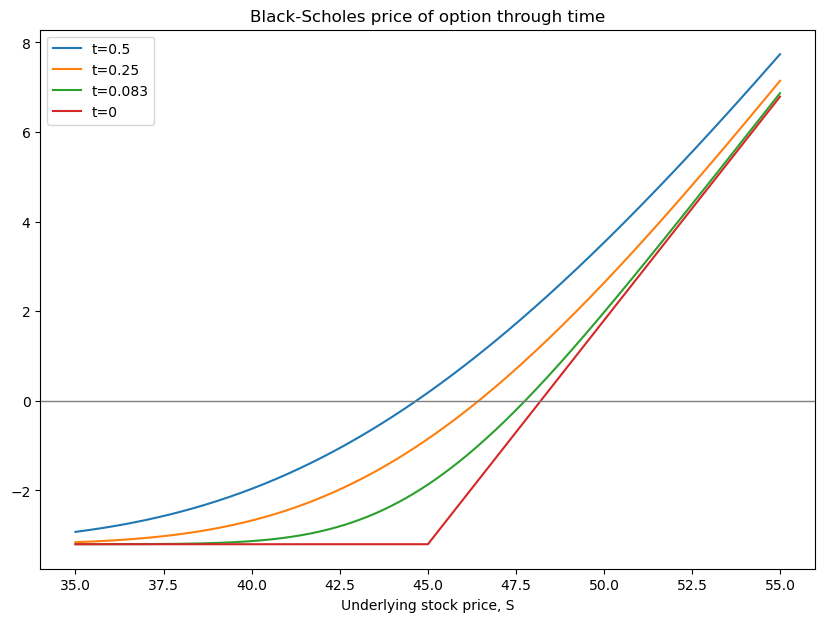

In [26]:
# plot the call payoffs
plt.figure(3, figsize=(10, 7))
plt.plot(S_, black_scholes_call_value_six_months) 
plt.plot(S_, black_scholes_call_value_three_months) 
plt.plot(S_, black_scholes_call_value_one_month) 
plt.plot(S_, call_payoff_at_expiration) 
plt.axhline(y=0, lw=1, c="grey") 
plt.title("Black-Scholes price of option through time") 
plt.xlabel("Underlying stock price, S") 
plt.legend(["t=0.5", "t=0.25", "t=0.083", "t=0"], loc=2)

As the time to expiration decreases, the value of the option collapses towards the value of the option at expiration, or the payoff value.